## MODEL
- In order to start, some analysis in the dataset will be make it.
- First of all, I will import the libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## FEATURE ENGINEERING

- I import the dataset.

In [2]:
df=pd.read_csv("./General_Fecha_1-2-3")

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
df.head()

,Unnamed: 0,NAME,GOLES,ASISTENCIAS,MINUTOS_JUGADOS,POSICION,RATING,TIROS_ARCO,TIROS_FUERA_ARCO,TIROS_BLOQUEADOS,NOTAS,DESPEJES,TIROS_BLOQUEADOS_POR_EL_JUGADOR,INTERCEPCIONES,TACKLES.1,DRIBBLED_PAST,NOTAS.1,TOQUES,KEY_PASSES,NOTAS.2,POSSESION_LOST,FOULS,WAS_FOULED,OFFSIDES,SALVADAS,PUNCHES,HIGH_CLAIMS,NOTAS.3,DUELOS_R,DUELOS_E,GAMBETAS_R,GAMBETAS_E,CROSSES_R,CROSSES_E,LONG_BALLS_R,LONG_BALLS_E,DUELOS_TERRESTRES_R,DUELOS_TERRESTRES_E,DUELOS_AEREOS_R,DUELOS_AEREROS_E,RUNS_OUT_R,RUN_OUT_E,PASES_R,PASES_E,%PASES_E
0,0,Jorman Campuzano,0.0,1.0,90.0,M,7.8,0.0,0.0,0.0,-,3.0,2.0,4.0,4.0,3.0,-,72.0,1.0,-,13.0,3.0,6.0,0.0,NaN,NaN,NaN,NaN,18.0,10.0,0.0,0.0,0.0,0.0,9.0,6.0,17.0,10.0,1.0,0.0,NaN,NaN,35.0,45.0,78.0
1,1,Fernando Márquez,1.0,0.0,17.0,F,7.5,1.0,0.0,0.0,-,1.0,0.0,0.0,1.0,1.0,-,13.0,0.0,-,2.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,5.0,4.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,2.0,2.0,2.0,NaN,NaN,7.0,7.0,100.0
2,2,Javier García,0.0,0.0,90.0,G,7.5,0.0,0.0,0.0,-,1.0,0.0,0.0,0.0,0.0,-,44.0,0.0,-,16.0,0.0,1.0,0.0,5.0,0.0,0.0,Saves from inside box: 5,1.0,1.0,0.0,0.0,0.0,0.0,25.0,9.0,1.0,1.0,0.0,0.0,0.0,0.0,12.0,28.0,43.0
3,3,Ezequiel Cañete,0.0,0.0,88.0,M,7.4,0.0,1.0,1.0,-,1.0,0.0,1.0,5.0,2.0,-,93.0,2.0,-,22.0,4.0,3.0,0.0,NaN,NaN,NaN,NaN,21.0,10.0,1.0,0.0,9.0,4.0,4.0,4.0,16.0,8.0,5.0,2.0,NaN,NaN,52.0,63.0,83.0
4,4,Nicolás Cordero,0.0,0.0,90.0,F,7.3,4.0,1.0,2.0,-,0.0,0.0,1.0,0.0,0.0,-,29.0,0.0,-,7.0,3.0,1.0,1.0,NaN,NaN,NaN,NaN,12.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,7.0,6.0,NaN,NaN,8.0,12.0,67.0


- I´m going to drop some features with text because I´m not going to use them.

In [5]:
df.drop(["NOTAS","NOTAS.1","NOTAS.2","NOTAS.3"],
        axis=1,
       inplace=True)

In [6]:
df["NAME"].value_counts()

Sebastián Sosa            12
Nicolás Castro             9
Nicolás Fernández          9
Lisandro López             8
Domingo Blanco             6
                          ..
Gastón Benavídez           1
Juan Ignacio Rodriguez     1
Diego González             1
Leonardo Jara              1
Emanuel Herrera            1
Name: NAME, Length: 684, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2229 entries, 0 to 2228
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       2229 non-null   int64  
 1   NAME                             2229 non-null   object 
 2   GOLES                            2229 non-null   float64
 3   ASISTENCIAS                      2229 non-null   float64
 4   MINUTOS_JUGADOS                  2229 non-null   float64
 5   POSICION                         2229 non-null   object 
 6   RATING                           2180 non-null   float64
 7   TIROS_ARCO                       2229 non-null   float64
 8   TIROS_FUERA_ARCO                 2229 non-null   float64
 9   TIROS_BLOQUEADOS                 2229 non-null   float64
 10  DESPEJES                         2229 non-null   float64
 11  TIROS_BLOQUEADOS_POR_EL_JUGADOR  2229 non-null   float64
 12  INTERCEPCIONES      

- I will create new features using the proportion of pass/duels/crosses/etc made and pass/duels/crosses/etc won.

In [8]:
df["DUELOS_P"]=df["DUELOS_E"]/df["DUELOS_R"]
df["GAMBETAS_P"]=df["GAMBETAS_E"]/df["GAMBETAS_R"]
df["CROSSES_P"]=df["CROSSES_E"]/df["CROSSES_R"]
df["LONG_BALLS_P"]=df["LONG_BALLS_E"]/df["LONG_BALLS_R"]
df["DUELOS_TERRESTRES_P"]=df["DUELOS_TERRESTRES_E"]/df["DUELOS_TERRESTRES_R"]
df["DUELOS_AEREROS_P"]=df["DUELOS_AEREROS_E"]/df["DUELOS_AEREOS_R"]

In [9]:
## I will rename this features because I forgot to do it before.
df=df.rename(columns={'TACKLES.1': 'TACKLES'})

In [10]:
df.columns

Index(['Unnamed: 0', 'NAME', 'GOLES', 'ASISTENCIAS', 'MINUTOS_JUGADOS',
       'POSICION', 'RATING', 'TIROS_ARCO', 'TIROS_FUERA_ARCO',
       'TIROS_BLOQUEADOS', 'DESPEJES', 'TIROS_BLOQUEADOS_POR_EL_JUGADOR',
       'INTERCEPCIONES', 'TACKLES', 'DRIBBLED_PAST', 'TOQUES', 'KEY_PASSES',
       'POSSESION_LOST', 'FOULS', 'WAS_FOULED', 'OFFSIDES', 'SALVADAS',
       'PUNCHES', 'HIGH_CLAIMS', 'DUELOS_R', 'DUELOS_E', 'GAMBETAS_R',
       'GAMBETAS_E', 'CROSSES_R', 'CROSSES_E', 'LONG_BALLS_R', 'LONG_BALLS_E',
       'DUELOS_TERRESTRES_R', 'DUELOS_TERRESTRES_E', 'DUELOS_AEREOS_R',
       'DUELOS_AEREROS_E', 'RUNS_OUT_R', 'RUN_OUT_E', 'PASES_R', 'PASES_E',
       '%PASES_E', 'DUELOS_P', 'GAMBETAS_P', 'CROSSES_P', 'LONG_BALLS_P',
       'DUELOS_TERRESTRES_P', 'DUELOS_AEREROS_P'],
      dtype='object')

In [11]:
df.head()

,Unnamed: 0,NAME,GOLES,ASISTENCIAS,MINUTOS_JUGADOS,POSICION,RATING,TIROS_ARCO,TIROS_FUERA_ARCO,TIROS_BLOQUEADOS,DESPEJES,TIROS_BLOQUEADOS_POR_EL_JUGADOR,INTERCEPCIONES,TACKLES,DRIBBLED_PAST,TOQUES,KEY_PASSES,POSSESION_LOST,FOULS,WAS_FOULED,OFFSIDES,SALVADAS,PUNCHES,HIGH_CLAIMS,DUELOS_R,DUELOS_E,GAMBETAS_R,GAMBETAS_E,CROSSES_R,CROSSES_E,LONG_BALLS_R,LONG_BALLS_E,DUELOS_TERRESTRES_R,DUELOS_TERRESTRES_E,DUELOS_AEREOS_R,DUELOS_AEREROS_E,RUNS_OUT_R,RUN_OUT_E,PASES_R,PASES_E,%PASES_E,DUELOS_P,GAMBETAS_P,CROSSES_P,LONG_BALLS_P,DUELOS_TERRESTRES_P,DUELOS_AEREROS_P
0,0,Jorman Campuzano,0.0,1.0,90.0,M,7.8,0.0,0.0,0.0,3.0,2.0,4.0,4.0,3.0,72.0,1.0,13.0,3.0,6.0,0.0,NaN,NaN,NaN,18.0,10.0,0.0,0.0,0.0,0.0,9.0,6.0,17.0,10.0,1.0,0.0,NaN,NaN,35.0,45.0,78.0,0.555556,NaN,NaN,0.666667,0.588235,0.000000
1,1,Fernando Márquez,1.0,0.0,17.0,F,7.5,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,13.0,0.0,2.0,0.0,1.0,0.0,NaN,NaN,NaN,5.0,4.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,2.0,2.0,2.0,NaN,NaN,7.0,7.0,100.0,0.800000,NaN,NaN,1.000000,0.666667,1.000000
2,2,Javier García,0.0,0.0,90.0,G,7.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,44.0,0.0,16.0,0.0,1.0,0.0,5.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,25.0,9.0,1.0,1.0,0.0,0.0,0.0,0.0,12.0,28.0,43.0,1.000000,NaN,NaN,0.360000,1.000000,NaN
3,3,Ezequiel Cañete,0.0,0.0,88.0,M,7.4,0.0,1.0,1.0,1.0,0.0,1.0,5.0,2.0,93.0,2.0,22.0,4.0,3.0,0.0,NaN,NaN,NaN,21.0,10.0,1.0,0.0,9.0,4.0,4.0,4.0,16.0,8.0,5.0,2.0,NaN,NaN,52.0,63.0,83.0,0.476190,0.0,0.444444,1.000000,0.500000,0.400000
4,4,Nicolás Cordero,0.0,0.0,90.0,F,7.3,4.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,29.0,0.0,7.0,3.0,1.0,1.0,NaN,NaN,NaN,12.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,7.0,6.0,NaN,NaN,8.0,12.0,67.0,0.583333,NaN,NaN,NaN,0.200000,0.857143


In [12]:
# The Nan data from "Rating" will be eliminated because we can not use it.
df.dropna(subset = ["RATING"], inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2180 entries, 0 to 2227
Data columns (total 47 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       2180 non-null   int64  
 1   NAME                             2180 non-null   object 
 2   GOLES                            2180 non-null   float64
 3   ASISTENCIAS                      2180 non-null   float64
 4   MINUTOS_JUGADOS                  2180 non-null   float64
 5   POSICION                         2180 non-null   object 
 6   RATING                           2180 non-null   float64
 7   TIROS_ARCO                       2180 non-null   float64
 8   TIROS_FUERA_ARCO                 2180 non-null   float64
 9   TIROS_BLOQUEADOS                 2180 non-null   float64
 10  DESPEJES                         2180 non-null   float64
 11  TIROS_BLOQUEADOS_POR_EL_JUGADOR  2180 non-null   float64
 12  INTERCEPCIONES      

In [14]:
# It seems that there are not the same amount of players for each position. 

In [15]:
bar=df.groupby(by="POSICION").count()

Text(0.5, 1.0, 'AMOUNT OF REGISTER FROM EVERY PLAYER')

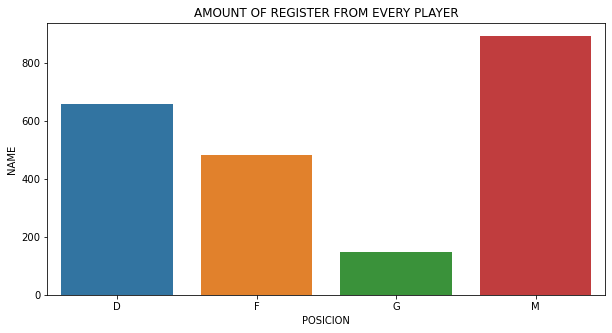

In [16]:
plt.subplots(figsize=(10,5))
ax = sns.barplot(x=bar.index, y="NAME", data=bar)
plt.title("AMOUNT OF REGISTER FROM EVERY PLAYER")

- In order to know the distribution of the y-target I will make a plot.

Text(0.5, 1.0, 'Histograma')

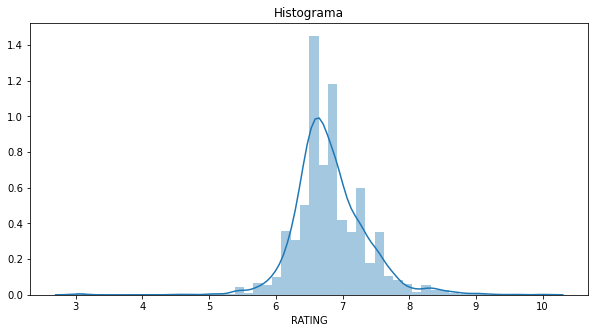

In [17]:
plt.subplots(figsize=(10,5))
sns.distplot(df["RATING"])
plt.title("Histograma")

- As it is known, the relevant features of the goalkepers are not the same as the rest, so it could be a nice idea to make a subset with that rows.

In [18]:
goal_keeper=df[df["POSICION"]=="G"]
goal_keeper.shape

(147, 47)

In [19]:
goal_keeper.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 2 to 2202
Data columns (total 47 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       147 non-null    int64  
 1   NAME                             147 non-null    object 
 2   GOLES                            147 non-null    float64
 3   ASISTENCIAS                      147 non-null    float64
 4   MINUTOS_JUGADOS                  147 non-null    float64
 5   POSICION                         147 non-null    object 
 6   RATING                           147 non-null    float64
 7   TIROS_ARCO                       147 non-null    float64
 8   TIROS_FUERA_ARCO                 147 non-null    float64
 9   TIROS_BLOQUEADOS                 147 non-null    float64
 10  DESPEJES                         147 non-null    float64
 11  TIROS_BLOQUEADOS_POR_EL_JUGADOR  147 non-null    float64
 12  INTERCEPCIONES       

- A new dataset with field players will be created.

In [20]:
field_players=df[df["POSICION"]!="G"]
field_players.shape

(2033, 47)

In [21]:
field_players=pd.get_dummies(field_players,columns=['POSICION'])

## FEATURE SELECTION

- In order to know which feature will be right for the model, I will use some algorithms and plots to see it.

In [22]:
# I want to know if there are any feature with the same value in each register.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(field_players.drop(labels=['RATING',"NAME","Unnamed: 0"], axis=1),
    field_players["RATING"],
    test_size=0.3,
    random_state=0)

In [23]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
numeric_features=field_players.select_dtypes(include=[np.float])
var_thres.fit(numeric_features)


VarianceThreshold(threshold=0)

In [24]:
constant_columns = [column for column in numeric_features.columns
                    if column not in numeric_features.columns[var_thres.get_support()]]

print(len(constant_columns))
print(constant_columns)

0
[]


- There is not any feature with low variance

In [25]:
# I want to drop any feature with high correlation with another, because I can reduce the amount of features.
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [26]:
corr_features = correlation(X_train, 0.8)
len(set(corr_features))

11

In [27]:
corr_features

{'DUELOS_AEREROS_E',
 'DUELOS_E',
 'DUELOS_TERRESTRES_E',
 'DUELOS_TERRESTRES_P',
 'DUELOS_TERRESTRES_R',
 'GAMBETAS_E',
 'GAMBETAS_P',
 'LONG_BALLS_E',
 'PASES_E',
 'PASES_R',
 'RUN_OUT_E'}

In [28]:
field_players.drop(corr_features,axis=1,inplace=True)

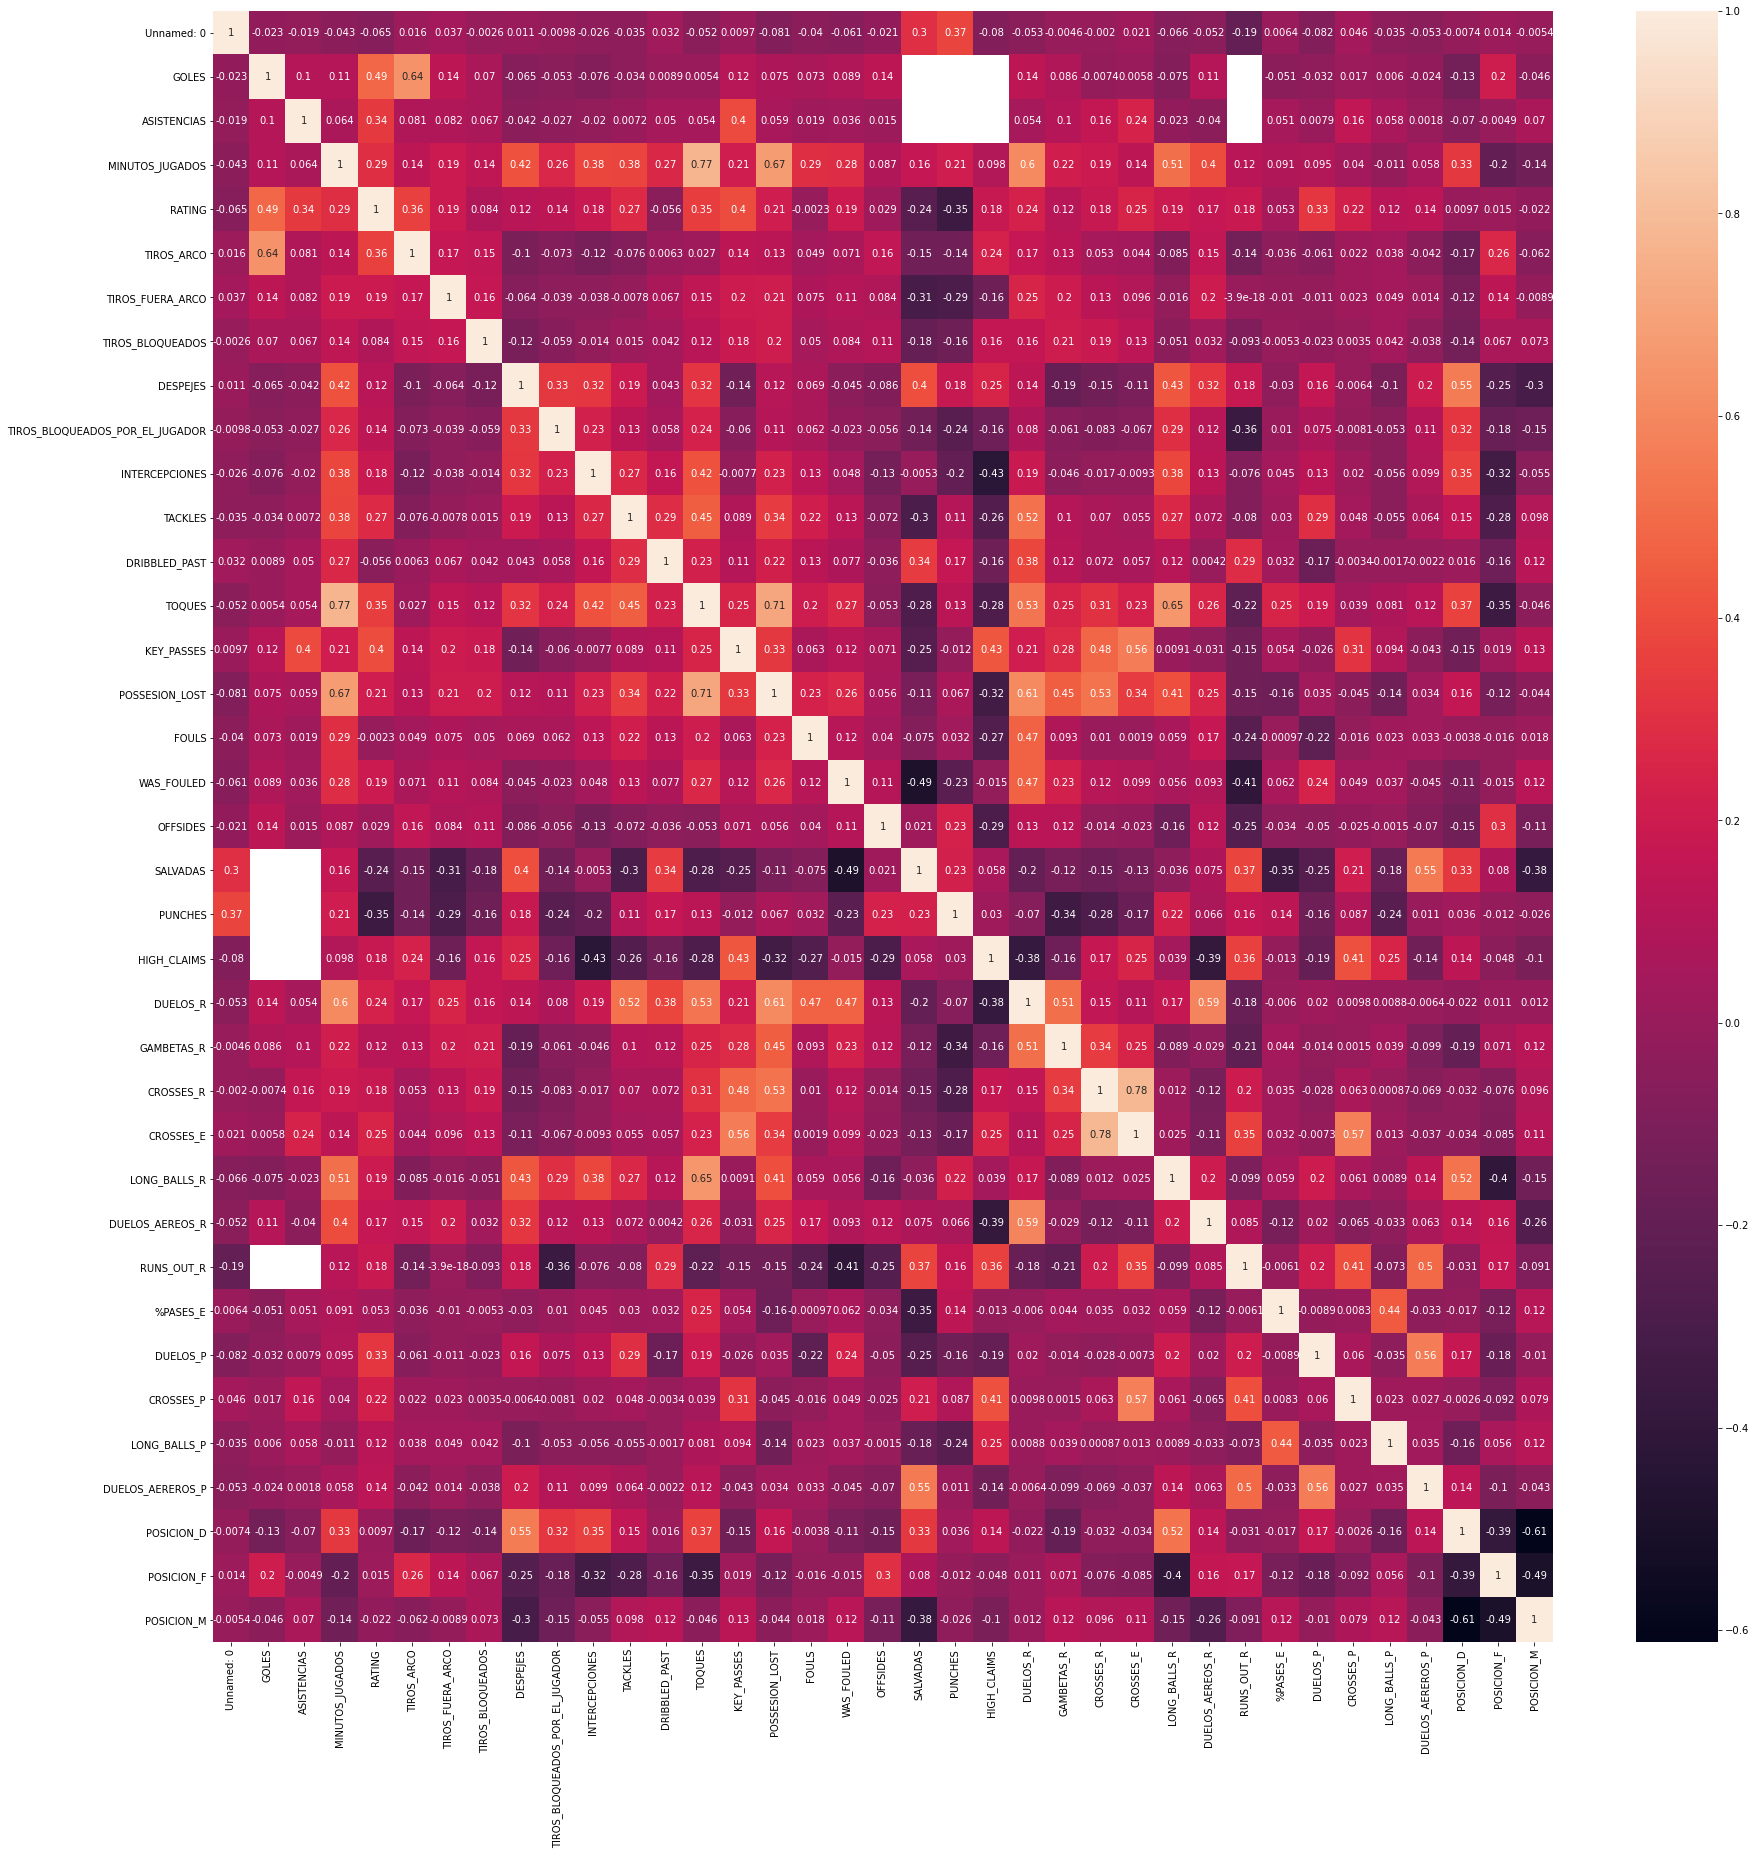

In [29]:
# Now, I will make a correlation plot in order to see how is the linear relation between the features and the y-target.
plt.subplots(figsize=(30,30))
ax = sns.heatmap(field_players.corr(), annot=True)


- I can see that there is not any feature very correlated with y than the others so I will choose the best features to see it better.

In [30]:
correlations=field_players.corr()
indice=correlations[correlations["RATING"]>0.3].index

In [31]:
field_players.corr().index

Index(['Unnamed: 0', 'GOLES', 'ASISTENCIAS', 'MINUTOS_JUGADOS', 'RATING',
       'TIROS_ARCO', 'TIROS_FUERA_ARCO', 'TIROS_BLOQUEADOS', 'DESPEJES',
       'TIROS_BLOQUEADOS_POR_EL_JUGADOR', 'INTERCEPCIONES', 'TACKLES',
       'DRIBBLED_PAST', 'TOQUES', 'KEY_PASSES', 'POSSESION_LOST', 'FOULS',
       'WAS_FOULED', 'OFFSIDES', 'SALVADAS', 'PUNCHES', 'HIGH_CLAIMS',
       'DUELOS_R', 'GAMBETAS_R', 'CROSSES_R', 'CROSSES_E', 'LONG_BALLS_R',
       'DUELOS_AEREOS_R', 'RUNS_OUT_R', '%PASES_E', 'DUELOS_P', 'CROSSES_P',
       'LONG_BALLS_P', 'DUELOS_AEREROS_P', 'POSICION_D', 'POSICION_F',
       'POSICION_M'],
      dtype='object')

In [32]:
top_features=correlations[indice][correlations["RATING"]>0.3]
top_features

,GOLES,ASISTENCIAS,RATING,TIROS_ARCO,TOQUES,KEY_PASSES,DUELOS_P
GOLES,1.000000,0.100276,0.487961,0.635298,0.005419,0.116596,-0.032456
ASISTENCIAS,0.100276,1.000000,0.336134,0.081088,0.054378,0.395058,0.007860
RATING,0.487961,0.336134,1.000000,0.363341,0.345523,0.400191,0.325375
TIROS_ARCO,0.635298,0.081088,0.363341,1.000000,0.027184,0.142611,-0.061176
TOQUES,0.005419,0.054378,0.345523,0.027184,1.000000,0.246038,0.191757
KEY_PASSES,0.116596,0.395058,0.400191,0.142611,0.246038,1.000000,-0.025546
DUELOS_P,-0.032456,0.007860,0.325375,-0.061176,0.191757,-0.025546,1.000000


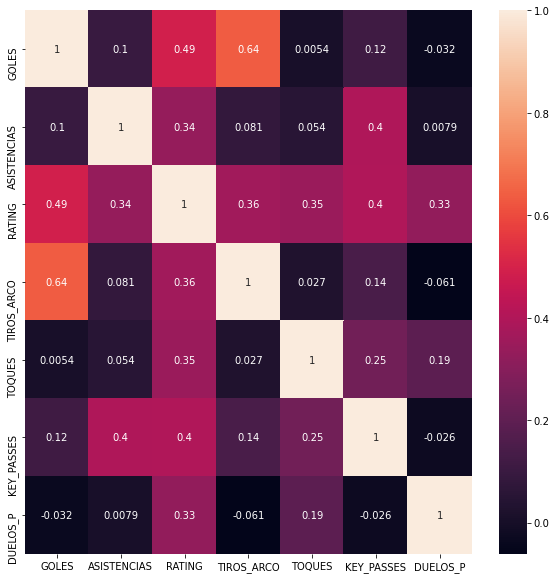

In [33]:
plt.subplots(figsize=(10,10))
ax = sns.heatmap(top_features, annot=True)

- I will make more plots to see better the data.

In [34]:
top_features.columns

Index(['GOLES', 'ASISTENCIAS', 'RATING', 'TIROS_ARCO', 'TOQUES', 'KEY_PASSES',
       'DUELOS_P'],
      dtype='object')

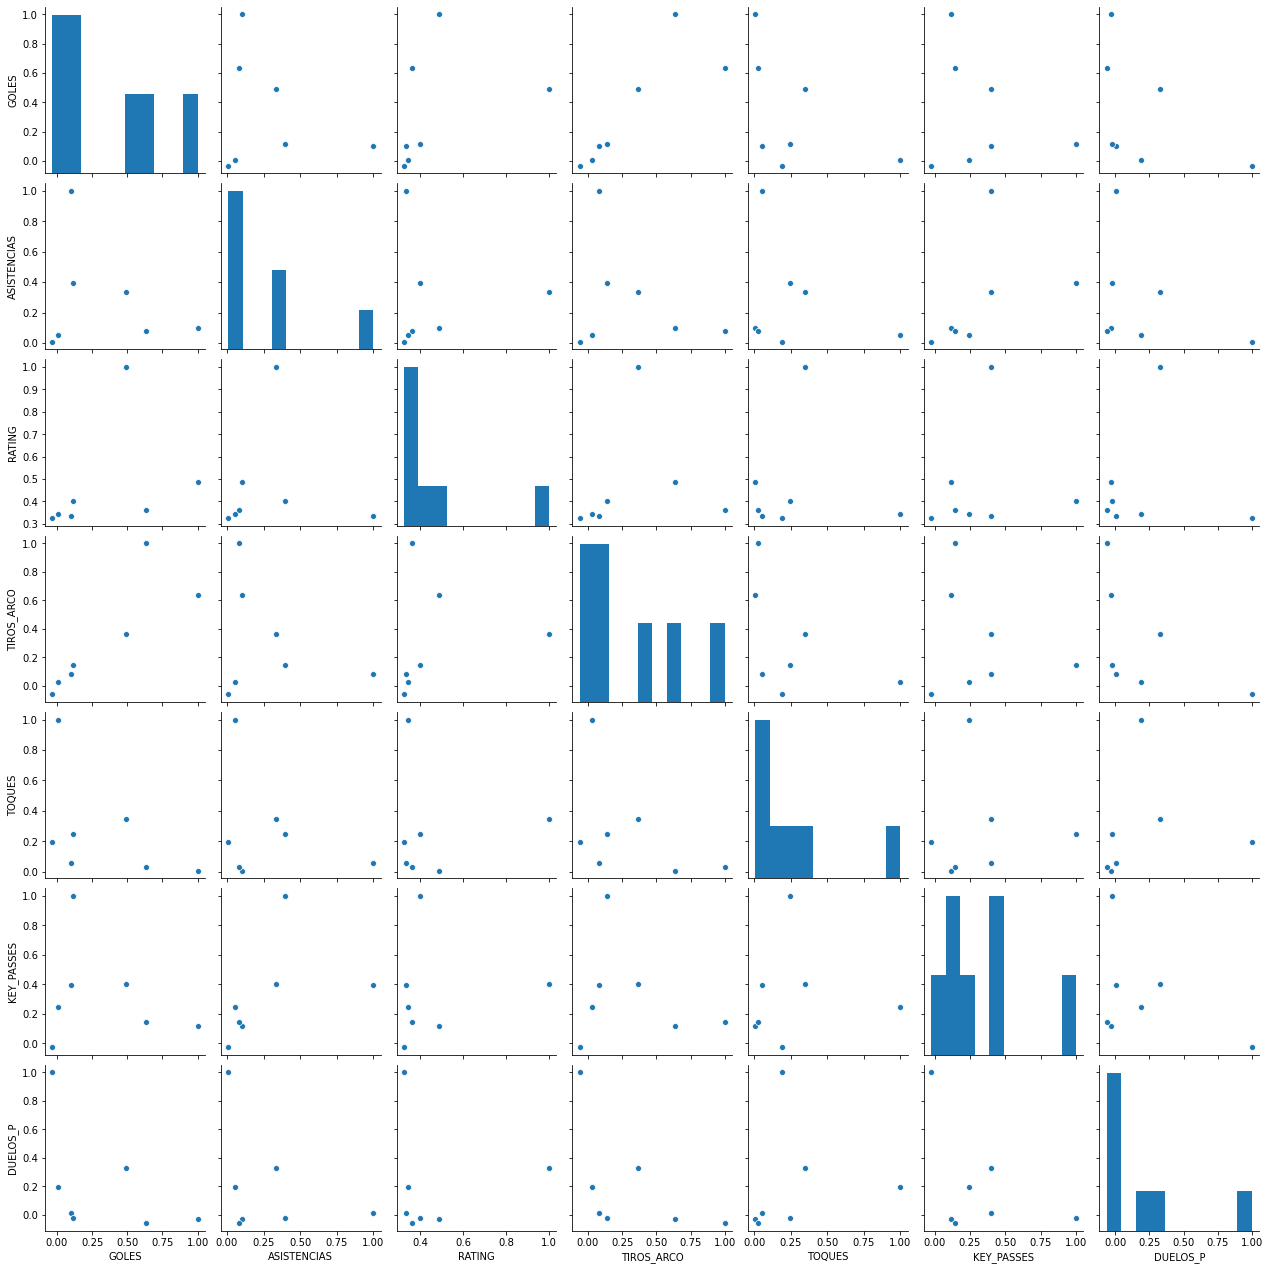

In [35]:
sns.pairplot(top_features)

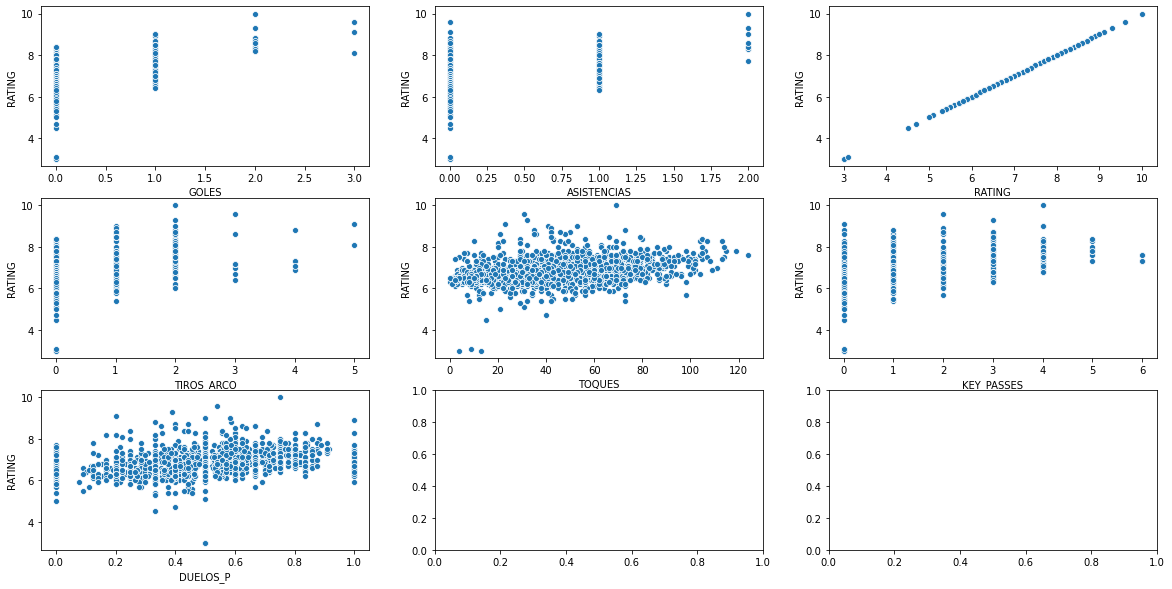

In [36]:
variables_numericas=indice # o más columnas
columns=3
fig,ax=plt.subplots(figsize=(20,10),
                   nrows=3,
                   ncols=3)
for indx,var in enumerate(variables_numericas):
    i=indx//columns
    j=indx%columns
    sns.scatterplot(x=field_players[var],
                    y=field_players["RATING"],
                    ax=ax[i][j])

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(field_players.drop(labels=['RATING',"NAME","Unnamed: 0"], axis=1),
    field_players["RATING"],
    test_size=0.3,
    random_state=0)

In [38]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X_train.fillna(0), y_train)
mutual_info

array([0.11015598, 0.04741716, 0.07446349, 0.08003204, 0.        ,
       0.        , 0.02049944, 0.01116039, 0.01281229, 0.04602014,
       0.01520078, 0.1424544 , 0.0767494 , 0.02616926, 0.02322394,
       0.02624086, 0.        , 0.01304451, 0.00296354, 0.01189692,
       0.05767756, 0.        , 0.02857266, 0.06578929, 0.04495143,
       0.0195278 , 0.        , 0.02372659, 0.16879102, 0.0500816 ,
       0.05028876, 0.02392702, 0.        , 0.01882373, 0.00524795])

In [39]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

DUELOS_P                           0.168791
TOQUES                             0.142454
GOLES                              0.110156
TIROS_ARCO                         0.080032
KEY_PASSES                         0.076749
MINUTOS_JUGADOS                    0.074463
CROSSES_E                          0.065789
DUELOS_R                           0.057678
LONG_BALLS_P                       0.050289
CROSSES_P                          0.050082
ASISTENCIAS                        0.047417
TACKLES                            0.046020
LONG_BALLS_R                       0.044951
CROSSES_R                          0.028573
WAS_FOULED                         0.026241
POSSESION_LOST                     0.026169
DUELOS_AEREROS_P                   0.023927
%PASES_E                           0.023727
FOULS                              0.023224
DESPEJES                           0.020499
DUELOS_AEREOS_R                    0.019528
POSICION_F                         0.018824
DRIBBLED_PAST                   

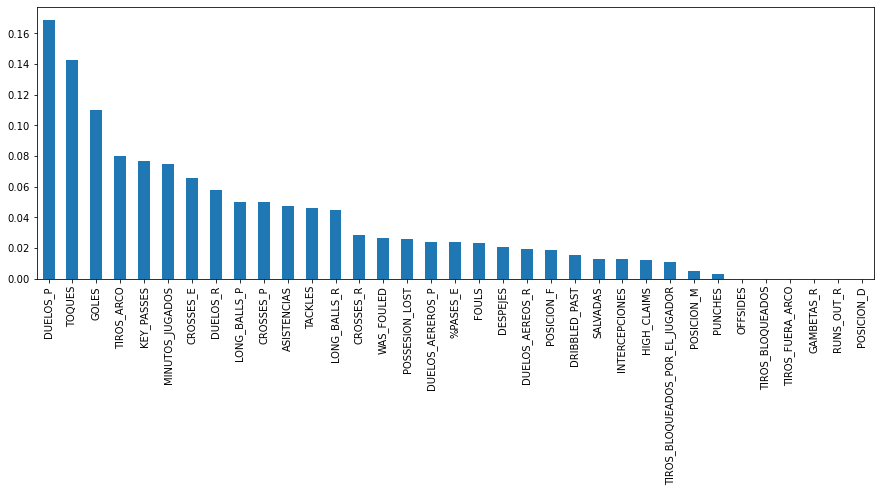

In [40]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [41]:
from sklearn.feature_selection import SelectPercentile
## Selecting the top 20 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=10)
selected_top_columns.fit(X_train.fillna(0), y_train)
selected_top_columns.get_support(1)

array([ 0, 11, 20, 28], dtype=int64)

In [42]:
mutual_info.sort_values(ascending=False)

DUELOS_P                           0.168791
TOQUES                             0.142454
GOLES                              0.110156
TIROS_ARCO                         0.080032
KEY_PASSES                         0.076749
MINUTOS_JUGADOS                    0.074463
CROSSES_E                          0.065789
DUELOS_R                           0.057678
LONG_BALLS_P                       0.050289
CROSSES_P                          0.050082
ASISTENCIAS                        0.047417
TACKLES                            0.046020
LONG_BALLS_R                       0.044951
CROSSES_R                          0.028573
WAS_FOULED                         0.026241
POSSESION_LOST                     0.026169
DUELOS_AEREROS_P                   0.023927
%PASES_E                           0.023727
FOULS                              0.023224
DESPEJES                           0.020499
DUELOS_AEREOS_R                    0.019528
POSICION_F                         0.018824
DRIBBLED_PAST                   

In [43]:
X_train.columns[selected_top_columns.get_support(1)]

Index(['GOLES', 'TOQUES', 'DUELOS_R', 'DUELOS_P'], dtype='object')

In [44]:
columnas=X_train.columns[selected_top_columns.get_support(1)]

In [45]:
field_players[['GOLES', 'ASISTENCIAS', 'MINUTOS_JUGADOS', 'TIROS_ARCO', 'TACKLES',
       'TOQUES', 'KEY_PASSES', 'FOULS', 'DUELOS_R', 'CROSSES_R',
       'LONG_BALLS_R', 'DUELOS_P', 'CROSSES_P', 'LONG_BALLS_P']].head()

,GOLES,ASISTENCIAS,MINUTOS_JUGADOS,TIROS_ARCO,TACKLES,TOQUES,KEY_PASSES,FOULS,DUELOS_R,CROSSES_R,LONG_BALLS_R,DUELOS_P,CROSSES_P,LONG_BALLS_P
0,0.0,1.0,90.0,0.0,4.0,72.0,1.0,3.0,18.0,0.0,9.0,0.555556,NaN,0.666667
1,1.0,0.0,17.0,1.0,1.0,13.0,0.0,0.0,5.0,0.0,1.0,0.800000,NaN,1.000000
3,0.0,0.0,88.0,0.0,5.0,93.0,2.0,4.0,21.0,9.0,4.0,0.476190,0.444444,1.000000
4,0.0,0.0,90.0,4.0,0.0,29.0,0.0,3.0,12.0,0.0,0.0,0.583333,NaN,NaN
5,0.0,0.0,90.0,0.0,1.0,44.0,4.0,0.0,5.0,8.0,2.0,0.600000,0.500000,0.500000


## MODEL SELECTION

- I will use the best features for the model. 
- In order to know which model adjust better to the problem, i will train differents machine learning regressor models.
- After that, I will use the best one to optimize.

In [46]:
# I will use the best features for the model.
X=field_players[['GOLES', 'ASISTENCIAS', 'MINUTOS_JUGADOS', 'TIROS_ARCO', 'TACKLES',
       'TOQUES', 'KEY_PASSES', 'FOULS', 'DUELOS_R', 'CROSSES_R',
       'LONG_BALLS_R', 'DUELOS_P', 'CROSSES_P', 'LONG_BALLS_P']].fillna(0)
y=field_players["RATING"]
X_train,X_test,y_train,y_test=train_test_split(X,
    y,
    test_size=0.3,
    random_state=0)

In [47]:
print(X_train.info())
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1423 entries, 1626 to 755
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GOLES            1423 non-null   float64
 1   ASISTENCIAS      1423 non-null   float64
 2   MINUTOS_JUGADOS  1423 non-null   float64
 3   TIROS_ARCO       1423 non-null   float64
 4   TACKLES          1423 non-null   float64
 5   TOQUES           1423 non-null   float64
 6   KEY_PASSES       1423 non-null   float64
 7   FOULS            1423 non-null   float64
 8   DUELOS_R         1423 non-null   float64
 9   CROSSES_R        1423 non-null   float64
 10  LONG_BALLS_R     1423 non-null   float64
 11  DUELOS_P         1423 non-null   float64
 12  CROSSES_P        1423 non-null   float64
 13  LONG_BALLS_P     1423 non-null   float64
dtypes: float64(14)
memory usage: 166.8 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 610 entries, 2144 to 2084
Data columns (total 14 columns)

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
reg = LinearRegression().fit(X_train, y_train)
print(reg.score(X_train, y_train))
print(reg.score(X_test, y_test))
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)
print((mean_squared_error(y_train, y_pred_train)**(1/2)))
print((mean_squared_error(y_test, y_pred_test)**(1/2)))

0.5372791759088024
0.6229910694266043
0.3559071124964921
0.31933275429190183


In [49]:
from sklearn.ensemble import RandomForestRegressor
regre = RandomForestRegressor(max_depth=2, random_state=0)
regre.fit(X_train, y_train)
print(regre.score(X_train, y_train))
print(regre.score(X_test, y_test))
y_pred_train=regre.predict(X_train)
y_pred_test=regre.predict(X_test)
print((mean_squared_error(y_train, y_pred_train)**(1/2)))
print((mean_squared_error(y_test, y_pred_test)**(1/2)))

0.36480421840235355
0.406637555514081
0.41699509578709776
0.40061543281901263


In [50]:
from sklearn.ensemble import AdaBoostRegressor
regr = AdaBoostRegressor(random_state=0, n_estimators=100)
regr.fit(X_train, y_train)
print(regr.score(X_train, y_train))
print(regr.score(X_test, y_test))
y_pred_train=regr.predict(X_train)
y_pred_test=regr.predict(X_test)
print((mean_squared_error(y_train, y_pred_train)**(1/2)))
print((mean_squared_error(y_test, y_pred_test)**(1/2)))

0.4968100241961291
0.37167863063562223
0.3711445905963572
0.41224800547765117


In [51]:
import xgboost as xgb
regr = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)
regr.fit(X_train, y_train)
print(regr.score(X_train, y_train))
print(regr.score(X_test, y_test))
y_pred_train=regr.predict(X_train)
y_pred_test=regr.predict(X_test)
print((mean_squared_error(y_train, y_pred_train)**(1/2)))
print((mean_squared_error(y_test, y_pred_test)**(1/2)))


0.7830011158716701
0.6083297468645379
0.2437282639183307
0.3254827241975985


In [52]:
import lightgbm as lgb #pip install lightgbm
cl1f = lgb.LGBMRegressor()
cl1f.fit(X_train, y_train)
print(cl1f.score(X_train, y_train))
print(cl1f.score(X_test, y_test))
y_pred_train=cl1f.predict(X_train)
y_pred_test=cl1f.predict(X_test)
print((mean_squared_error(y_train, y_pred_train)**(1/2)))
print((mean_squared_error(y_test, y_pred_test)**(1/2)))

0.8345687369329146
0.5257492731707141
0.21280701378170302
0.3581555212161095


- The best one is XgBoost because it does not has much overfitting, and has a lower mean squared error too so I will optimize.

## Hypertuning

I will use gridsearch, so I´m going to make a grid with each parameter and I will use the best combination of parameter.

In [53]:
# from sklearn.model_selection import GridSearchCV
# params = { 'max_depth': [3,6,10],
#           'learning_rate': [0.01, 0.05, 0.1],
#           'n_estimators': [100, 500, 1000],
#           'colsample_bytree': [0.3, 0.7]}

# clf = GridSearchCV(estimator=xgb.XGBRegressor(), 
#                   param_grid=params,
#                   scoring='neg_mean_squared_error', 
#                   verbose=1)
#clf.fit(X_train, y_train)
#print("Best parameters:", clf.best_params_)
#print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

In [54]:
import xgboost as xgb
model = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate= 0.01,
    max_depth=3,
    colsample_bytree=0.3
)
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [55]:
#Best parameters: {'colsample_bytree': 0.3, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000}
#Lowest RMSE:  0.3495115271145693

In [56]:
from sklearn.metrics import r2_score
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)
print(r2_score(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test))

0.6440941258067197
0.6417602565918896


In [57]:
print((mean_squared_error(y_train, y_pred_train)**(1/2)))
print((mean_squared_error(y_test, y_pred_test)**(1/2)))

0.31213661962569195
0.31128237438869866


- It is a very nice result because I can reduce the overfitting without lossing too much score.

## CREACION API

- In order to use the model, I will create a simple API.

In [59]:
# !pip install flask

In [60]:
# Now, I will save the model in a file.
import pickle
filename="Modelo_Rating.sav"
pickle.dump(model, open(filename,'wb'))

In [61]:
# nombres de las variables que se van a usar en la API
cols = X.columns
cols

Index(['GOLES', 'ASISTENCIAS', 'MINUTOS_JUGADOS', 'TIROS_ARCO', 'TACKLES',
       'TOQUES', 'KEY_PASSES', 'FOULS', 'DUELOS_R', 'CROSSES_R',
       'LONG_BALLS_R', 'DUELOS_P', 'CROSSES_P', 'LONG_BALLS_P'],
      dtype='object')

In [62]:
# Now I want to know what inputs the model is prepared for.
print("{")
for i,name in enumerate(cols):
    print(f'"{name}":{{"min":{field_players[name].min()}, "max":{field_players[name].max()}}}{"," if i < (len(cols)-1) else ""}')
print("}")

{
"GOLES":{"min":0.0, "max":3.0},
"ASISTENCIAS":{"min":0.0, "max":2.0},
"MINUTOS_JUGADOS":{"min":6.0, "max":90.0},
"TIROS_ARCO":{"min":0.0, "max":5.0},
"TACKLES":{"min":0.0, "max":11.0},
"TOQUES":{"min":0.0, "max":124.0},
"KEY_PASSES":{"min":0.0, "max":6.0},
"FOULS":{"min":0.0, "max":7.0},
"DUELOS_R":{"min":0.0, "max":30.0},
"CROSSES_R":{"min":0.0, "max":26.0},
"LONG_BALLS_R":{"min":0.0, "max":27.0},
"DUELOS_P":{"min":0.0, "max":1.0},
"CROSSES_P":{"min":0.0, "max":1.0},
"LONG_BALLS_P":{"min":0.0, "max":1.0}
}
